## Context

* For this project, you will take part in a Kaggle competition based on tabular data. The goal is to design a machine learning algorithm that, given information on a particular concertgoer experience, can automatically classify the enjoyment of that concertgoer to that concert. In this classification problem, we have 4 classes. The training dataset consists of 170,000 training examples and the testing dataset contains 30,000 test examples.

* Each training rows contains a unique ID, 18 attributes and 1 target containing the class
that needs to be predicted. You will be evaluated on the test private leaderboard mean
F1-Score.

## Instructions

* To participate in the competition, you must provide a list of predicted outputs for the
instances on the Kaggle website. To solve the problem you are encouraged to use any
classification methods you can think off, presented in the course or otherwise. Looking
into creative way to create new features from those provided may prove especially usefull
in this competition.

* The goal of this competition is to classify a particular concert experience in one of four classes: 
1. Worst Concert Ever
2. Did Not Enjoy
3. Enjoyed
4. Best Concert Ever

* To perform this task you will be given information on the band, the venue, as well as the specific concertgoers.
 
* The dataset contains information on the specific concert, the specific band, and the specific concertgoers. It is to be noted that all three of those are unchanged across all of the training data and test data. Any conclusions on the specific characteristics of a band, concert, or concertgoers will also extend to the test set.

* Unfortunately, the data-gathering step was not impeccable. One can expect some of the training attributes not always to reflect the underlying reality. However, the "Concert Experience" column has been verified and is 100% accurate.

In [354]:
# Import packages
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt


# Load data
train_data = pd.read_csv('./data/train_cleaned.csv')
valid_data = pd.read_csv('./data/test.csv')
old_train_data = pd.read_csv('./data/train.csv')

In [355]:
'''
! pip install https://github.com/pd-profiling/pd-profiling/archive/master.zip
! pip install ipywidgets
'''

'\n! pip install https://github.com/pd-profiling/pd-profiling/archive/master.zip\n! pip install ipywidgets\n'

In [356]:
from pandas_profiling import ProfileReport

Profile = ProfileReport(train_data, title='Concert Enjoyment')

In [357]:
Profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [358]:
train_data

Id                      Band Name  \
0       ConcertExperience_180106    Teenage Crazy Blue Knickers   
1       ConcertExperience_146268                   Beyond Devon   
2       ConcertExperience_128743                     Ron Talent   
3       ConcertExperience_140839                  Devon Revival   
4        ConcertExperience_19149                   Beyond Devon   
...                          ...                            ...   
169995   ConcertExperience_14055            Crazy Joystick Cult   
169996  ConcertExperience_192792            Crazy Joystick Cult   
169997  ConcertExperience_152942                Why Frogs, Why?   
169998  ConcertExperience_138957  Twilight of the Joystick Gods   
169999  ConcertExperience_132336                Joystick Attack   

            Band Genre          Band Country of Origin  Band Debut  \
0       Indie/Alt Rock  United States of America (USA)      1976.0   
1            Pop Music  United States of America (USA)      1968.0   
2          Rock n Roll                          Canada      1955.0   
3                  RnB  United States of America (USA)      1992.0   
4            Pop Music  United States of America (USA)      1968.0   
...                ...                             ...         ...   
169995             RnB                          Canada      1985.0   
169996             RnB                          Canada      1985.0   
169997     Heavy Metal                          Canada      2005.0   
169998     Hip Hop/Rap  United States of America (USA)      1995.0   
169999     Heavy Metal             United Kingdom (UK)      2008.0   

        Concert ID  Concert Attendance  Inside Venue   Rain Seated  \
0            900.0              2980.0         False  False    NaN   
1            731.0                54.0          True  False   True   
2            794.0            162754.0          True  False   True   
3            704.0              8103.0         False   True  False   
4             95.0                54.0         False  False  False   
...            ...                 ...           ...    ...    ...   
169995        70.0            162754.0          True  False  False   
169996       963.0                54.0         False  False  False   
169997       764.0                54.0         False  False  False   
169998       694.0             22026.0         False   True   True   
169999       661.0              2980.0          True  False  False   

        Personnality Trait 1  Personnality Trait 2  Personnality Trait 3  \
0                   0.330843             -0.958408             -0.943548   
1                  -2.069449              0.017777             -1.910675   
2                  -0.484268              1.968772             -0.064167   
3                  -0.858054              1.022827             -0.348389   
4                  -0.793029             -1.166528             -0.043766   
...                      ...                   ...                   ...   
169995             -0.095021              0.175175              0.914245   
169996             -0.733719             -0.285776             -0.323312   
169997              0.744969             -0.965547              1.020598   
169998              0.821976              0.351411              0.175762   
169999             -1.017410              0.883248             -0.184107   

        Personnality Trait 4  Concert Goer Age    Concert Goer ID  \
0                  -1.636806              29.0  concert_goer_1985   
1                   0.610265              43.0  concert_goer_1874   
2                  -1.260871              68.0   concert_goer_442   
3                  -1.147251              17.0  concert_goer_1149   
4                   0.969661              59.0   concert_goer_930   
...                      ...               ...                ...   
169995              0.357359              50.0   concert_goer_707   
169996              0.641180              71.0  concert_goer_1373   
169997   

## Replace "Concert Enjoyment column" with numerical values and removing 'concer_goer_' before any concert goer id

In [361]:
# Replace "Concert Enjoyment column" with numerical values
train_data['Concert Enjoyment'] = train_data['Concert Enjoyment'].replace(['Worst Concert Ever', 'Did Not Enjoy', 'Enjoyed', 'Best Concert Ever'], [0, 1, 2, 3])

In [363]:
# Remove 'concer_goer_' before all Concer Goer ID and transform it into integer
train_data['Concert Goer ID'] = train_data['Concert Goer ID'].str.replace('concert_goer_', '')
train_data['Concert Goer ID'] = train_data['Concert Goer ID'].astype(int)
train_data.head()

Id                    Band Name      Band Genre  \
0  ConcertExperience_180106  Teenage Crazy Blue Knickers  Indie/Alt Rock   
1  ConcertExperience_146268                 Beyond Devon       Pop Music   
2  ConcertExperience_128743                   Ron Talent     Rock n Roll   
3  ConcertExperience_140839                Devon Revival             RnB   
4   ConcertExperience_19149                 Beyond Devon       Pop Music   

           Band Country of Origin  Band Debut  Concert ID  Concert Attendance  \
0  United States of America (USA)      1976.0       900.0              2980.0   
1  United States of America (USA)      1968.0       731.0                54.0   
2                          Canada      1955.0       794.0            162754.0   
3  United States of America (USA)      1992.0       704.0              8103.0   
4  United States of America (USA)      1968.0        95.0                54.0   

   Inside Venue   Rain Seated  Personnality Trait 1  Personnality Trait 2  \
0         False  False    NaN              0.330843             -0.958408   
1          True  False   True             -2.069449              0.017777   
2          True  False   True             -0.484268              1.968772   
3         False   True  False             -0.858054              1.022827   
4         False  False  False             -0.793029             -1.166528   

   Personnality Trait 3  Personnality Trait 4  Concert Goer Age  \
0             -0.943548             -1.636806              29.0   
1             -1.910675              0.610265              43.0   
2             -0.064167             -1.260871              68.0   
3             -0.348389             -1.147251              17.0   
4             -0.043766              0.969661              59.0   

   Concert Goer ID  Height (cm)  Concert Goer Country of Origin  \
0             1985        140.0                        Paraguay   
1             1874        158.0             United Kingdom (UK)   
2              442        159.0  United States of America (USA)   
3             1149        150.0                          Canada   
4              930        166.0             United Kingdom (UK)   

   Concert Enjoyment  
0                  1  
1                  2  
2                  1  
3                  0  
4                  1

In [362]:
train_data.head()

Id                    Band Name      Band Genre  \
0  ConcertExperience_180106  Teenage Crazy Blue Knickers  Indie/Alt Rock   
1  ConcertExperience_146268                 Beyond Devon       Pop Music   
2  ConcertExperience_128743                   Ron Talent     Rock n Roll   
3  ConcertExperience_140839                Devon Revival             RnB   
4   ConcertExperience_19149                 Beyond Devon       Pop Music   

           Band Country of Origin  Band Debut  Concert ID  Concert Attendance  \
0  United States of America (USA)      1976.0       900.0              2980.0   
1  United States of America (USA)      1968.0       731.0                54.0   
2                          Canada      1955.0       794.0            162754.0   
3  United States of America (USA)      1992.0       704.0              8103.0   
4  United States of America (USA)      1968.0        95.0                54.0   

   Inside Venue   Rain Seated  Personnality Trait 1  Personnality Trait 2  \
0         False  False    NaN              0.330843             -0.958408   
1          True  False   True             -2.069449              0.017777   
2          True  False   True             -0.484268              1.968772   
3         False   True  False             -0.858054              1.022827   
4         False  False  False             -0.793029             -1.166528   

   Personnality Trait 3  Personnality Trait 4  Concert Goer Age  \
0             -0.943548             -1.636806              29.0   
1             -1.910675              0.610265              43.0   
2             -0.064167             -1.260871              68.0   
3             -0.348389             -1.147251              17.0   
4             -0.043766              0.969661              59.0   

     Concert Goer ID  Height (cm)  Concert Goer Country of Origin  \
0  concert_goer_1985        140.0                        Paraguay   
1  concert_goer_1874        158.0             United Kingdom (UK)   
2   concert_goer_442        159.0  United States of America (USA)   
3  concert_goer_1149        150.0                          Canada   
4   concert_goer_930        166.0             United Kingdom (UK)   

   Concert Enjoyment  
0                  1  
1                  2  
2                  1  
3                  0  
4                  1

## Recommendation engine

### Concert goer list

In [256]:
# Regroup all the "Concert Goer ID" and calculate their similarities based on "Personnaliy Trait 1", "Personnality Trait 2", "Personnality Trait 3", "Personnality Trait 4", "Concert Goer Country of Origin", "Concert Goer Age", "Height (cm)", and the most "Band Genre" they like
# group by
concert_goer_list = train_data.groupby('Concert Goer ID').agg({'Personnality Trait 1': 'mean', 'Personnality Trait 2': 'mean', 'Personnality Trait 3': 'mean', 'Personnality Trait 4': 'mean', 'Concert Goer Country of Origin': 'first', 'Concert Goer Age': 'mean', 'Height (cm)': 'mean', 'Band Genre': 'first'})

In [257]:
concert_goer_list

Personnality Trait 1  Personnality Trait 2  \
Concert Goer ID                                               
0                            0.095759             -1.280273   
1                           -0.546159             -0.270642   
2                           -1.272085              0.954456   
3                            0.710029             -1.516083   
4                            0.981505              0.309393   
...                               ...                   ...   
1995                         0.808210              1.855136   
1996                        -0.218859             -1.780220   
1997                        -0.881540             -0.028059   
1998                         0.735620              0.044908   
1999                        -0.933925              0.094326   

                 Personnality Trait 3  Personnality Trait 4  \
Concert Goer ID                                               
0                           -1.007229             -0.307440   
1                           -0.420332              0.646780   
2                            1.460192             -1.019082   
3                           -0.136410             -0.126536   
4                            1.579118             -0.803883   
...                               ...                   ...   
1995                        -0.599020              0.005541   
1996                         2.447348             -1.019258   
1997                         1.179518              0.001162   
1998                        -0.232546             -0.711789   
1999                         0.282381              0.710927   

                 Concert Goer Country of Origin  Concert Goer Age  \
Concert Goer ID                                                     
0                                        Canada              28.0   
1                                        Canada              35.0   
2                                        Canada              35.0   
3                United States of America (USA)              64.0   
4                                        Canada              63.0   
...                                         ...               ...   
1995                                   Tanzania              17.0   
1996             United States of America (USA)              67.0   
1997                                     Canada              44.0   
1998                                      Chile              48.0   
1999             United States of America (USA)              23.0   

                 Height (cm)      Band Genre  
Concert Goer ID                               
0                      163.0       Pop Music  
1                      165.0     Heavy Metal  
2                      155.0     Rock n Roll  
3                      167.0     Hip Hop/Rap  
4                      160.0         Country  
...                      ...             ...  
1995                   144.0     Hip Hop/Rap  
1996                   165.0     Hip Hop/Rap  
1997                   159.0     Hip Hop/Rap  
1998                   178.0       Pop Music  
1999                   161.0  Indie/Alt Rock  

[2000 rows x 8 columns]

### Concert rating

In [364]:
concert_list = train_data.groupby('Concert ID').agg({'Concert Enjoyment': 'mean'})
concert_list.loc[900]

Concert Enjoyment    1.945455
Name: 900.0, dtype: float64

In [365]:
# Add a new column "Concert Rating" to train_data which is the average of "Concert Enjoyment" for each "Concert ID"

train_data['Concert Rating'] = train_data['Concert ID'].map(concert_list['Concert Enjoyment'])
train_data

Id                      Band Name  \
0       ConcertExperience_180106    Teenage Crazy Blue Knickers   
1       ConcertExperience_146268                   Beyond Devon   
2       ConcertExperience_128743                     Ron Talent   
3       ConcertExperience_140839                  Devon Revival   
4        ConcertExperience_19149                   Beyond Devon   
...                          ...                            ...   
169995   ConcertExperience_14055            Crazy Joystick Cult   
169996  ConcertExperience_192792            Crazy Joystick Cult   
169997  ConcertExperience_152942                Why Frogs, Why?   
169998  ConcertExperience_138957  Twilight of the Joystick Gods   
169999  ConcertExperience_132336                Joystick Attack   

            Band Genre          Band Country of Origin  Band Debut  \
0       Indie/Alt Rock  United States of America (USA)      1976.0   
1            Pop Music  United States of America (USA)      1968.0   
2          Rock n Roll                          Canada      1955.0   
3                  RnB  United States of America (USA)      1992.0   
4            Pop Music  United States of America (USA)      1968.0   
...                ...                             ...         ...   
169995             RnB                          Canada      1985.0   
169996             RnB                          Canada      1985.0   
169997     Heavy Metal                          Canada      2005.0   
169998     Hip Hop/Rap  United States of America (USA)      1995.0   
169999     Heavy Metal             United Kingdom (UK)      2008.0   

        Concert ID  Concert Attendance  Inside Venue   Rain Seated  \
0            900.0              2980.0         False  False    NaN   
1            731.0                54.0          True  False   True   
2            794.0            162754.0          True  False   True   
3            704.0              8103.0         False   True  False   
4             95.0                54.0         False  False  False   
...            ...                 ...           ...    ...    ...   
169995        70.0            162754.0          True  False  False   
169996       963.0                54.0         False  False  False   
169997       764.0                54.0         False  False  False   
169998       694.0             22026.0         False   True   True   
169999       661.0              2980.0          True  False  False   

        Personnality Trait 1  Personnality Trait 2  Personnality Trait 3  \
0                   0.330843             -0.958408             -0.943548   
1                  -2.069449              0.017777             -1.910675   
2                  -0.484268              1.968772             -0.064167   
3                  -0.858054              1.022827             -0.348389   
4                  -0.793029             -1.166528             -0.043766   
...                      ...                   ...                   ...   
169995             -0.095021              0.175175              0.914245   
169996             -0.733719             -0.285776             -0.323312   
169997              0.744969             -0.965547              1.020598   
169998              0.821976              0.351411              0.175762   
169999             -1.017410              0.883248             -0.184107   

        Personnality Trait 4  Concert Goer Age  Concert Goer ID  Height (cm)  \
0                  -1.636806              29.0             1985        140.0   
1                   0.610265              43.0             1874        158.0   
2                  -1.260871              68.0              442        159.0   
3                  -1.147251              17.0             1149        150.0   
4                   0.969661              59.0              930        166.0   
...                      ...               ...              ...          ...   
169995              0.357359              50.0              707       

### Band rating

In [393]:
band_rating = train_data.groupby('Band Name').agg({'Concert Enjoyment': 'mean'})
band_rating

Concert Enjoyment
Band Name                                                    
A Dozen Running Iced Frogs                           1.269076
Allo Knickers                                        1.358967
Beyond Devon                                         2.181132
Big Autumn                                           1.769705
Big Division                                         1.581981
Big Frogs Dream                                      2.106739
Big Joystick                                         1.840732
Crazy Crazy                                          0.724778
Crazy Dream and a Pinch of Joystick                  0.873973
Crazy Frogs of Devon                                 1.352445
Crazy Joystick Cult                                  0.993267
Crazy Tooth                                          1.204997
Crazyplay                                            2.068296
Das Joystick                                         1.606169
Devon Revival                                        0.767250
Devon Thunder Thighs                                 1.101526
Disciples Of Devon                                   1.368820
Flight of the Knickers                               1.680923
Frogsica                                             0.896590
It's My Joystick                                     1.356259
Joystick A Dozen                                     1.820247
Joystick Army                                        2.108562
Joystick Attack                                      2.033832
Joystick for the Jockies                             1.601316
Joystick of the Big Knickers                         0.917300
King Blue                                            1.509849
Knickers A Dozen                                     2.236166
Knickers for the Jockies                             2.010572
Lord of the Crazy Frogs                              0.930561
My Heart, Your Thighs                                0.640563
Puddle of Joystick                                   1.477396
Purely Blue                                          0.913717
Ron Nor                                              2.165169
Ron Talent                                           0.704655
Ron's Midnight Jockies                               1.341069
Ronatron                                             2.079607
Rubbish Devon Frogs                                  1.536158
Running Twins                                        1.861209
Running at the Disco                                 0.701945
Running for the Crazy Woman                          1.773293
Running in Devon                                     0.948794
Super Crazy Frogs                                    2.045251
Taking Back Autumn                                   1.550223
Teenage Crazy Blue Knickers                          1.568355
The Big Service                                      0.554433
The Crazy Heroes of Devon                            2.396201
The Crazy R Experience                               0.964459
The Running Crazy Jockies                            2.352113
The Running Knickers                                 1.963458
This Joystick                                        2.202745
Twilight of the Joystick Gods                        2.118284
Undercover Joystick and the Crazy Knickers           2.062164
Why Frogs, Why?                                      0.917380

In [394]:
# sort band_rating by Concert Enjoyment
band_rating = band_rating.sort_values(by='Concert Enjoyment', ascending=False)
band_rating

Concert Enjoyment
Band Name                                                    
The Crazy Heroes of Devon                            2.396201
The Running Crazy Jockies                            2.352113
Knickers A Dozen                                     2.236166
This Joystick                                        2.202745
Beyond Devon                                         2.181132
Ron Nor                                              2.165169
Twilight of the Joystick Gods                        2.118284
Joystick Army                                        2.108562
Big Frogs Dream                                      2.106739
Ronatron                                             2.079607
Crazyplay                                            2.068296
Undercover Joystick and the Crazy Knickers           2.062164
Super Crazy Frogs                                    2.045251
Joystick Attack                                      2.033832
Knickers for the Jockies                             2.010572
The Running Knickers                                 1.963458
Running Twins                                        1.861209
Big Joystick                                         1.840732
Joystick A Dozen                                     1.820247
Running for the Crazy Woman                          1.773293
Big Autumn                                           1.769705
Flight of the Knickers                               1.680923
Das Joystick                                         1.606169
Joystick for the Jockies                             1.601316
Big Division                                         1.581981
Teenage Crazy Blue Knickers                          1.568355
Taking Back Autumn                                   1.550223
Rubbish Devon Frogs                                  1.536158
King Blue                                            1.509849
Puddle of Joystick                                   1.477396
Disciples Of Devon                                   1.368820
Allo Knickers                                        1.358967
It's My Joystick                                     1.356259
Crazy Frogs of Devon                                 1.352445
Ron's Midnight Jockies                               1.341069
A Dozen Running Iced Frogs                           1.269076
Crazy Tooth                                          1.204997
Devon Thunder Thighs                                 1.101526
Crazy Joystick Cult                                  0.993267
The Crazy R Experience                               0.964459
Running in Devon                                     0.948794
Lord of the Crazy Frogs                              0.930561
Why Frogs, Why?                                      0.917380
Joystick of the Big Knickers                         0.917300
Purely Blue                                          0.913717
Frogsica                                             0.896590
Crazy Dream and a Pinch of Joystick                  0.873973
Devon Revival                                        0.767250
Crazy Crazy                                          0.724778
Ron Talent                                           0.704655
Running at the Disco                                 0.701945
My Heart, Your Thighs                                0.640563
The Big Service                                      0.554433

### Band rating by number of attendances to their concert

In [402]:
# Count the number of "Concert Attendance" for each Band Name (add the Concert Attendance number for each) and concatenate with band_rating
band_rating['Concert Attendance'] = train_data.groupby('Band Name').agg({'Concert Attendance': 'sum'})
# sort by Concert Attendance
band_rating = band_rating.sort_values(by='Concert Attendance', ascending=False)
band_rating

Concert Enjoyment  Concert Count  \
Band Name                                                                      
The Running Crazy Jockies                            2.352113           3621   
Crazyplay                                            2.068296           3397   
Joystick for the Jockies                             1.601316           3040   
Ron Nor                                              2.165169           4117   
The Crazy Heroes of Devon                            2.396201           3738   
Big Autumn                                           1.769705           3083   
The Crazy R Experience                               0.964459           3911   
Joystick A Dozen                                     1.820247           3566   
Puddle of Joystick                                   1.477396           4070   
Crazy Crazy                                          0.724778           4956   
This Joystick                                        2.202745           3206   
Ron's Midnight Jockies                               1.341069           5128   
Ron Talent                                           0.704655           2685   
Undercover Joystick and the Crazy Knickers           2.062164           3716   
The Running Knickers                                 1.963458           3065   
Joystick Army                                        2.108562           3574   
Running Twins                                        1.861209           4251   
Crazy Frogs of Devon                                 1.352445           2372   
Das Joystick                                         1.606169           3080   
Lord of the Crazy Frogs                              0.930561           2765   
Knickers for the Jockies                             2.010572           3216   
Frogsica                                             0.896590           3578   
Crazy Dream and a Pinch of Joystick                  0.873973           3896   
Allo Knickers                                        1.358967           3563   
Rubbish Devon Frogs                                  1.536158           4107   
Big Joystick                                         1.840732           2568   
Super Crazy Frogs                                    2.045251           3580   
Disciples Of Devon                                   1.368820           3560   
Joystick of the Big Knickers                         0.917300           3555   
Running at the Disco                                 0.701945           2211   
My Heart, Your Thighs                                0.640563           3550   
Devon Thunder Thighs                                 1.101526           3211   
King Blue                                            1.509849           3046   
The Big Service                                      0.554433           3068   
Purely Blue                                          0.913717           2712   
Teenage Crazy Blue Knickers                          1.568355           2882   
Why Frogs, Why?                                      0.917380           3038   
Twilight of the Joystick Gods                        2.118284           4430   
Running for the Crazy Woman                          1.773293           2007   
Crazy Tooth                                          1.204997           3722   
It's My Joystick                                     1.356259           2748   
Big Division                                         1.581981           2897   
Beyond Devon                                         2.181132           2385   
Taking Back Autumn                                   1.550223           2917   
Crazy Joystick Cult                                  0.993267           2525   
Devon Revival                                        0.767250           3884   
Joystick Attack                                      2.033832           1537   
Flight of the Knickers                               1.680923           3250   
Big Frogs Dream                             

In [404]:
# Attribute a classment to each band based on their number of Concert Attendance
band_rating['Band Classment'] = band_rating['Concert Attendance'].rank(method='dense', ascending=True)
band_rating

Concert Enjoyment  Concert Count  \
Band Name                                                                      
The Running Crazy Jockies                            2.352113           3621   
Crazyplay                                            2.068296           3397   
Joystick for the Jockies                             1.601316           3040   
Ron Nor                                              2.165169           4117   
The Crazy Heroes of Devon                            2.396201           3738   
Big Autumn                                           1.769705           3083   
The Crazy R Experience                               0.964459           3911   
Joystick A Dozen                                     1.820247           3566   
Puddle of Joystick                                   1.477396           4070   
Crazy Crazy                                          0.724778           4956   
This Joystick                                        2.202745           3206   
Ron's Midnight Jockies                               1.341069           5128   
Ron Talent                                           0.704655           2685   
Undercover Joystick and the Crazy Knickers           2.062164           3716   
The Running Knickers                                 1.963458           3065   
Joystick Army                                        2.108562           3574   
Running Twins                                        1.861209           4251   
Crazy Frogs of Devon                                 1.352445           2372   
Das Joystick                                         1.606169           3080   
Lord of the Crazy Frogs                              0.930561           2765   
Knickers for the Jockies                             2.010572           3216   
Frogsica                                             0.896590           3578   
Crazy Dream and a Pinch of Joystick                  0.873973           3896   
Allo Knickers                                        1.358967           3563   
Rubbish Devon Frogs                                  1.536158           4107   
Big Joystick                                         1.840732           2568   
Super Crazy Frogs                                    2.045251           3580   
Disciples Of Devon                                   1.368820           3560   
Joystick of the Big Knickers                         0.917300           3555   
Running at the Disco                                 0.701945           2211   
My Heart, Your Thighs                                0.640563           3550   
Devon Thunder Thighs                                 1.101526           3211   
King Blue                                            1.509849           3046   
The Big Service                                      0.554433           3068   
Purely Blue                                          0.913717           2712   
Teenage Crazy Blue Knickers                          1.568355           2882   
Why Frogs, Why?                                      0.917380           3038   
Twilight of the Joystick Gods                        2.118284           4430   
Running for the Crazy Woman                          1.773293           2007   
Crazy Tooth                                          1.204997           3722   
It's My Joystick                                     1.356259           2748   
Big Division                                         1.581981           2897   
Beyond Devon                                         2.181132           2385   
Taking Back Autumn                                   1.550223           2917   
Crazy Joystick Cult                                  0.993267           2525   
Devon Revival                                        0.767250           3884   
Joystick Attack                                      2.033832           1537   
Flight of the Knickers                               1.680923           3250   
Big Frogs Dream                             

In [405]:
# Map the classment to train_data
train_data['Band Classment'] = train_data['Band Name'].map(band_rating['Band Classment'])
train_data

Id                      Band Name  \
0       ConcertExperience_180106    Teenage Crazy Blue Knickers   
1       ConcertExperience_146268                   Beyond Devon   
2       ConcertExperience_128743                     Ron Talent   
3       ConcertExperience_140839                  Devon Revival   
4        ConcertExperience_19149                   Beyond Devon   
...                          ...                            ...   
169995   ConcertExperience_14055            Crazy Joystick Cult   
169996  ConcertExperience_192792            Crazy Joystick Cult   
169997  ConcertExperience_152942                Why Frogs, Why?   
169998  ConcertExperience_138957  Twilight of the Joystick Gods   
169999  ConcertExperience_132336                Joystick Attack   

            Band Genre          Band Country of Origin  Band Debut  \
0       Indie/Alt Rock  United States of America (USA)      1976.0   
1            Pop Music  United States of America (USA)      1968.0   
2          Rock n Roll                          Canada      1955.0   
3                  RnB  United States of America (USA)      1992.0   
4            Pop Music  United States of America (USA)      1968.0   
...                ...                             ...         ...   
169995             RnB                          Canada      1985.0   
169996             RnB                          Canada      1985.0   
169997     Heavy Metal                          Canada      2005.0   
169998     Hip Hop/Rap  United States of America (USA)      1995.0   
169999     Heavy Metal             United Kingdom (UK)      2008.0   

        Concert ID  Concert Attendance  Inside Venue   Rain Seated  ...  \
0            900.0              2980.0         False  False    NaN  ...   
1            731.0                54.0          True  False   True  ...   
2            794.0            162754.0          True  False   True  ...   
3            704.0              8103.0         False   True  False  ...   
4             95.0                54.0         False  False  False  ...   
...            ...                 ...           ...    ...    ...  ...   
169995        70.0            162754.0          True  False  False  ...   
169996       963.0                54.0         False  False  False  ...   
169997       764.0                54.0         False  False  False  ...   
169998       694.0             22026.0         False   True   True  ...   
169999       661.0              2980.0          True  False  False  ...   

        Concert Enjoyment  Concert Rating  Indie/Alt Rock user rate  \
0                       1        1.945455                  2.000000   
1                       2        2.180791                  2.000000   
2                       1        0.791209                  1.500000   
3                       0        0.274854                  1.400000   
4                       1        2.006329                  1.375000   
...                   ...             ...                       ...   
169995                  1        0.872611                  1.916667   
169996                  0        1.158824                  1.250000   
169997                  1        0.668605                  1.777778   
169998                  1        1.275000                  1.777778   
169999                  3        2.315476                  1.818182   

        Pop Music user rate  Rock n Roll user rate  RnB user rate  \
0                  1.555556               2.076923       1.000000   
1                  1.909091               1.166667       1.615385   
2                  1.000000               1.388889       1.105263   
3                  1.529412               1.500000       1.666667   
4                  1.600000               1.166667       0.944444   
...                     ...                    ...            ...   
169995             1.416667               1.571429       1.800000   
169996             1.062500               1.857143       0.785714   
169997   

In [316]:
train_data['Band Rating'] = train_data['Band Name'].map(band_rating['Concert Enjoyment'])
train_data

Id                      Band Name  \
0       ConcertExperience_180106    Teenage Crazy Blue Knickers   
1       ConcertExperience_146268                   Beyond Devon   
2       ConcertExperience_128743                     Ron Talent   
3       ConcertExperience_140839                  Devon Revival   
4        ConcertExperience_19149                   Beyond Devon   
...                          ...                            ...   
169995   ConcertExperience_14055            Crazy Joystick Cult   
169996  ConcertExperience_192792            Crazy Joystick Cult   
169997  ConcertExperience_152942                Why Frogs, Why?   
169998  ConcertExperience_138957  Twilight of the Joystick Gods   
169999  ConcertExperience_132336                Joystick Attack   

            Band Genre          Band Country of Origin  Band Debut  \
0       Indie/Alt Rock  United States of America (USA)      1976.0   
1            Pop Music  United States of America (USA)      1968.0   
2          Rock n Roll                          Canada      1955.0   
3                  RnB  United States of America (USA)      1992.0   
4            Pop Music  United States of America (USA)      1968.0   
...                ...                             ...         ...   
169995             RnB                          Canada      1985.0   
169996             RnB                          Canada      1985.0   
169997     Heavy Metal                          Canada      2005.0   
169998     Hip Hop/Rap  United States of America (USA)      1995.0   
169999     Heavy Metal             United Kingdom (UK)      2008.0   

        Concert ID  Concert Attendance  Inside Venue   Rain Seated  ...  \
0            900.0              2980.0         False  False    NaN  ...   
1            731.0                54.0          True  False   True  ...   
2            794.0            162754.0          True  False   True  ...   
3            704.0              8103.0         False   True  False  ...   
4             95.0                54.0         False  False  False  ...   
...            ...                 ...           ...    ...    ...  ...   
169995        70.0            162754.0          True  False  False  ...   
169996       963.0                54.0         False  False  False  ...   
169997       764.0                54.0         False  False  False  ...   
169998       694.0             22026.0         False   True   True  ...   
169999       661.0              2980.0          True  False  False  ...   

        Personnality Trait 2  Personnality Trait 3  Personnality Trait 4  \
0                  -0.958408             -0.943548             -1.636806   
1                   0.017777             -1.910675              0.610265   
2                   1.968772             -0.064167             -1.260871   
3                   1.022827             -0.348389             -1.147251   
4                  -1.166528             -0.043766              0.969661   
...                      ...                   ...                   ...   
169995              0.175175              0.914245              0.357359   
169996             -0.285776             -0.323312              0.641180   
169997             -0.965547              1.020598              1.027389   
169998              0.351411              0.175762              1.455654   
169999              0.883248             -0.184107              0.631731   

        Concert Goer Age  Concert Goer ID  Height (cm)  \
0                   29.0             1985        140.0   
1                   43.0             1874        158.0   
2                   68.0              442        159.0   
3                   17.0             1149        150.0   
4                   59.0              930        166.0   
...                  ...              ...          ...   
169995              50.0              707        180.0   
169996              71.0             1373        143.0   
169997              27.0             1286       

### Band name into words

In [369]:
# create a vocabulary of words with 100 most common words in "Band Name" column but remove "the" and "and" and "of" and "for" and "my" from the vocabulary
from sklearn.feature_extraction.text import CountVectorizer

X = train_data[['Band Name']]

vectorizer = CountVectorizer(max_features=15, stop_words=['the', 'and', 'of', 'for', 'my'])
X_voc = vectorizer.fit_transform(X['Band Name'])

In [370]:
# Show the vocabulary
vectorizer.get_feature_names()

C:\Users\shahr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['autumn',
 'big',
 'blue',
 'crazy',
 'devon',
 'dozen',
 'dream',
 'frogs',
 'jockies',
 'joystick',
 'knickers',
 'ron',
 'running',
 'thighs',
 'why']

In [371]:
# Create a dataframe where there is the name in axis 0 and the number of times the word appears in axis 1
band_name = pd.DataFrame(X_voc.toarray(), columns=vectorizer.get_feature_names())
band_name

C:\Users\shahr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


autumn  big  blue  crazy  devon  dozen  dream  frogs  jockies  \
0            0    0     1      1      0      0      0      0        0   
1            0    0     0      0      1      0      0      0        0   
2            0    0     0      0      0      0      0      0        0   
3            0    0     0      0      1      0      0      0        0   
4            0    0     0      0      1      0      0      0        0   
...        ...  ...   ...    ...    ...    ...    ...    ...      ...   
169995       0    0     0      1      0      0      0      0        0   
169996       0    0     0      1      0      0      0      0        0   
169997       0    0     0      0      0      0      0      1        0   
169998       0    0     0      0      0      0      0      0        0   
169999       0    0     0      0      0      0      0      0        0   

        joystick  knickers  ron  running  thighs  why  
0              0         1    0        0       0    0  
1              0         0    0        0       0    0  
2              0         0    1        0       0    0  
3              0         0    0        0       0    0  
4              0         0    0        0       0    0  
...          ...       ...  ...      ...     ...  ...  
169995         1         0    0        0       0    0  
169996         1         0    0        0       0    0  
169997         0         0    0        0       0    2  
169998         1         0    0        0       0    0  
169999         1         0    0        0       0    0  

[170000 rows x 15 columns]

### Manipulations with Concer Goer Age and Band Debut

In [414]:
# Transform "Concert Goer Age" to "Year of Birth" when today is 2022
train_data['Year of Birth'] = 2022 - train_data['Concert Goer Age']

In [434]:
# Add a column 'Goer Year Class' which is the classment of the "Year of Birth" of each Concert Goer ID (assign 4 classes of age)
train_data['Goer Year Class'] = train_data['Year of Birth'].rank(method='dense', ascending=True, pct=True)
train_data['Goer Year Class'] = train_data['Goer Year Class'].apply(lambda x: 1 if x <= 0.25 else (2 if x <= 0.5 else (3 if x <= 0.75 else 4)))
train_data['Goer Year Class']

0         4
1         3
2         1
3         4
4         2
         ..
169995    2
169996    1
169997    4
169998    3
169999    3
Name: Goer Year Class, Length: 170000, dtype: int64

### Band genre rating by Concer Goer

In [366]:
# Get the mean of the Enjoyment of each Concert Goer ID depending of the Band Genre
band_genre_rating = train_data.groupby(['Band Genre', 'Concert Goer ID']).agg({'Concert Enjoyment': 'mean'})
band_genre_rating

Concert Enjoyment
Band Genre  Concert Goer ID                   
Country     0                         1.714286
            1                         1.500000
            2                         2.000000
            3                         1.250000
            4                         1.333333
...                                        ...
Rock n Roll 1995                      1.125000
            1996                      1.300000
            1997                      1.444444
            1998                      1.666667
            1999                      1.750000

[13833 rows x 1 columns]

In [367]:
# Add new columns for each band genre to train_data which is the mean of the Enjoyment of each Concert Goer ID depending of the Band Genre
for genre in train_data['Band Genre'].unique():
    train_data[genre + " user rate"] = train_data['Concert Goer ID'].map(band_genre_rating.loc[genre]['Concert Enjoyment'])

In [368]:
train_data


Id                      Band Name  \
0       ConcertExperience_180106    Teenage Crazy Blue Knickers   
1       ConcertExperience_146268                   Beyond Devon   
2       ConcertExperience_128743                     Ron Talent   
3       ConcertExperience_140839                  Devon Revival   
4        ConcertExperience_19149                   Beyond Devon   
...                          ...                            ...   
169995   ConcertExperience_14055            Crazy Joystick Cult   
169996  ConcertExperience_192792            Crazy Joystick Cult   
169997  ConcertExperience_152942                Why Frogs, Why?   
169998  ConcertExperience_138957  Twilight of the Joystick Gods   
169999  ConcertExperience_132336                Joystick Attack   

            Band Genre          Band Country of Origin  Band Debut  \
0       Indie/Alt Rock  United States of America (USA)      1976.0   
1            Pop Music  United States of America (USA)      1968.0   
2          Rock n Roll                          Canada      1955.0   
3                  RnB  United States of America (USA)      1992.0   
4            Pop Music  United States of America (USA)      1968.0   
...                ...                             ...         ...   
169995             RnB                          Canada      1985.0   
169996             RnB                          Canada      1985.0   
169997     Heavy Metal                          Canada      2005.0   
169998     Hip Hop/Rap  United States of America (USA)      1995.0   
169999     Heavy Metal             United Kingdom (UK)      2008.0   

        Concert ID  Concert Attendance  Inside Venue   Rain Seated  ...  \
0            900.0              2980.0         False  False    NaN  ...   
1            731.0                54.0          True  False   True  ...   
2            794.0            162754.0          True  False   True  ...   
3            704.0              8103.0         False   True  False  ...   
4             95.0                54.0         False  False  False  ...   
...            ...                 ...           ...    ...    ...  ...   
169995        70.0            162754.0          True  False  False  ...   
169996       963.0                54.0         False  False  False  ...   
169997       764.0                54.0         False  False  False  ...   
169998       694.0             22026.0         False   True   True  ...   
169999       661.0              2980.0          True  False  False  ...   

        Concert Goer Country of Origin  Concert Enjoyment  Concert Rating  \
0                             Paraguay                  1        1.945455   
1                  United Kingdom (UK)                  2        2.180791   
2       United States of America (USA)                  1        0.791209   
3                               Canada                  0        0.274854   
4                  United Kingdom (UK)                  1        2.006329   
...                                ...                ...             ...   
169995  United States of America (USA)                  1        0.872611   
169996                        Bulgaria                  0        1.158824   
169997                          Canada                  1        0.668605   
169998                          Canada                  1        1.275000   
169999                          Canada                  3        2.315476   

        Indie/Alt Rock user rate  Pop Music user rate  Rock n Roll user rate  \
0                       2.000000             1.555556               2.076923   
1                       2.000000             1.909091               1.166667   
2                       1.500000             1.000000               1.388889   
3                       1.400000             1.529412               1.500000   
4                       1.375000             1.600000               1.166667   
...                          ...                  ...                    ...  

### Band Name rating by Concer Goer

In [442]:
# Get the mean of the Enjoyment of each Concert Goer ID depending of the Band Name
band_name_rating = train_data.groupby(['Band Name', 'Concert Goer ID']).agg({'Concert Enjoyment': 'mean'})
band_name_rating

Concert Enjoyment
Band Name                  Concert Goer ID                   
A Dozen Running Iced Frogs 0                         2.000000
                           2                         2.000000
                           3                         0.750000
                           4                         1.750000
                           6                         1.333333
...                                                       ...
Why Frogs, Why?            1993                      0.500000
                           1994                      1.000000
                           1995                      1.000000
                           1996                      0.000000
                           1999                      1.500000

[83111 rows x 1 columns]

In [443]:
# Add new columns for each band name to train_data which is the mean of the Enjoyment of each Concert Goer ID depending of the Band Name
for name in train_data['Band Name'].unique():
    train_data[name + " user rate"] = train_data['Concert Goer ID'].map(band_name_rating.loc[name]['Concert Enjoyment'])
train_data

Id                      Band Name  \
0       ConcertExperience_180106    Teenage Crazy Blue Knickers   
1       ConcertExperience_146268                   Beyond Devon   
2       ConcertExperience_128743                     Ron Talent   
3       ConcertExperience_140839                  Devon Revival   
4        ConcertExperience_19149                   Beyond Devon   
...                          ...                            ...   
169995   ConcertExperience_14055            Crazy Joystick Cult   
169996  ConcertExperience_192792            Crazy Joystick Cult   
169997  ConcertExperience_152942                Why Frogs, Why?   
169998  ConcertExperience_138957  Twilight of the Joystick Gods   
169999  ConcertExperience_132336                Joystick Attack   

            Band Genre          Band Country of Origin  Band Debut  \
0       Indie/Alt Rock  United States of America (USA)      1976.0   
1            Pop Music  United States of America (USA)      1968.0   
2          Rock n Roll                          Canada      1955.0   
3                  RnB  United States of America (USA)      1992.0   
4            Pop Music  United States of America (USA)      1968.0   
...                ...                             ...         ...   
169995             RnB                          Canada      1985.0   
169996             RnB                          Canada      1985.0   
169997     Heavy Metal                          Canada      2005.0   
169998     Hip Hop/Rap  United States of America (USA)      1995.0   
169999     Heavy Metal             United Kingdom (UK)      2008.0   

        Concert ID  Concert Attendance  Inside Venue   Rain Seated  ...  \
0            900.0              2980.0         False  False    NaN  ...   
1            731.0                54.0          True  False   True  ...   
2            794.0            162754.0          True  False   True  ...   
3            704.0              8103.0         False   True  False  ...   
4             95.0                54.0         False  False  False  ...   
...            ...                 ...           ...    ...    ...  ...   
169995        70.0            162754.0          True  False  False  ...   
169996       963.0                54.0         False  False  False  ...   
169997       764.0                54.0         False  False  False  ...   
169998       694.0             22026.0         False   True   True  ...   
169999       661.0              2980.0          True  False  False  ...   

        Flight of the Knickers user rate  Lord of the Crazy Frogs user rate  \
0                                   1.50                                NaN   
1                                   2.00                                0.5   
2                                   1.00                                1.5   
3                                   2.00                                NaN   
4                                   1.00                                1.0   
...                                  ...                                ...   
169995                              1.25                                1.5   
169996                              1.00                                1.0   
169997                              2.00                                1.5   
169998                              2.20                                1.0   
169999                              3.00                                1.0   

        Crazy Frogs of Devon user rate  Big Frogs Dream user rate  \
0                                  1.0                   1.500000   
1                                  NaN                   2.500000   
2                                  0.0                   2.500000   
3                                  1.5                   2.000000   
4                                  1.0                        NaN   
...                                ...                        ...   
169995                             1.0             

In [451]:
# List all the "Band Name" but dont return to the line
for name in train_data['Band Name'].unique():
    print("'" + name + " user rate', ", end='')

'Teenage Crazy Blue Knickers user rate', 'Beyond Devon user rate', 'Ron Talent user rate', 'Devon Revival user rate', 'A Dozen Running Iced Frogs user rate', 'Big Joystick user rate', 'Ron's Midnight Jockies user rate', 'Running in Devon user rate', 'Running Twins user rate', 'Ronatron user rate', 'Big Division user rate', 'The Crazy Heroes of Devon user rate', 'My Heart, Your Thighs user rate', 'Why Frogs, Why? user rate', 'Joystick Army user rate', 'This Joystick user rate', 'Ron Nor user rate', 'Disciples Of Devon user rate', 'Purely Blue user rate', 'Crazy Crazy user rate', 'King Blue user rate', 'Twilight of the Joystick Gods user rate', 'Crazy Joystick Cult user rate', 'Joystick of the Big Knickers user rate', 'Joystick A Dozen user rate', 'Joystick for the Jockies user rate', 'Frogsica user rate', 'Rubbish Devon Frogs user rate', 'Running for the Crazy Woman user rate', 'Knickers for the Jockies user rate', 'Knickers A Dozen user rate', 'The Running Crazy Jockies user rate', 'Ru

## Beginning of Processing

In [473]:
# Extract the column "Concert ID", "Concert Goer ID", "Concert Rating" from train_data
concert_info = train_data[['Band Name', 'Band Genre', 'Band Country of Origin', 'Band Debut', 'Concert Attendance', 'Inside Venue', 'Rain', 'Concert ID', 'Concert Goer ID', 'Concert Goer Age', 'Seated', 'Personnality Trait 1', 'Personnality Trait 2', 'Personnality Trait 3', 'Personnality Trait 4', 'Height (cm)', 'Concert Goer Country of Origin', 'Concert Rating', 'Indie/Alt Rock user rate', 'Pop Music user rate', 'Rock n Roll user rate', 'RnB user rate', 'Heavy Metal user rate', 'Hip Hop/Rap user rate', 'Country user rate', 'Teenage Crazy Blue Knickers user rate', 'Beyond Devon user rate', 'Ron Talent user rate', 'Devon Revival user rate', 'A Dozen Running Iced Frogs user rate', 'Big Joystick user rate', "Ron's Midnight Jockies user rate", 'Running in Devon user rate', 'Running Twins user rate', 'Ronatron user rate', 'Big Division user rate', 'The Crazy Heroes of Devon user rate', 'My Heart, Your Thighs user rate', 'Why Frogs, Why? user rate', 'Joystick Army user rate', 'This Joystick user rate', 'Ron Nor user rate', 'Disciples Of Devon user rate', 'Purely Blue user rate', 'Crazy Crazy user rate', 'King Blue user rate', 'Twilight of the Joystick Gods user rate', 'Crazy Joystick Cult user rate', 'Joystick of the Big Knickers user rate', 'Joystick A Dozen user rate', 'Joystick for the Jockies user rate', 'Frogsica user rate', 'Rubbish Devon Frogs user rate', 'Running for the Crazy Woman user rate', 'Knickers for the Jockies user rate', 'Knickers A Dozen user rate', 'The Running Crazy Jockies user rate', 'Running at the Disco user rate', 'Big Autumn user rate', 'Crazy Dream and a Pinch of Joystick user rate', 'Puddle of Joystick user rate', "It's My Joystick user rate", 'Joystick Attack user rate', 'Crazyplay user rate', 'Devon Thunder Thighs user rate', 'The Running Knickers user rate', 'Taking Back Autumn user rate', 'Undercover Joystick and the Crazy Knickers user rate', 'Flight of the Knickers user rate', 'Lord of the Crazy Frogs user rate', 'Crazy Frogs of Devon user rate', 'Big Frogs Dream user rate', 'Das Joystick user rate', 'The Crazy R Experience user rate', 'Allo Knickers user rate', 'Super Crazy Frogs user rate', 'The Big Service user rate', 'Crazy Tooth user rate',  'Concert Enjoyment']]
concert_info

Band Name      Band Genre  \
0         Teenage Crazy Blue Knickers  Indie/Alt Rock   
1                        Beyond Devon       Pop Music   
2                          Ron Talent     Rock n Roll   
3                       Devon Revival             RnB   
4                        Beyond Devon       Pop Music   
...                               ...             ...   
169995            Crazy Joystick Cult             RnB   
169996            Crazy Joystick Cult             RnB   
169997                Why Frogs, Why?     Heavy Metal   
169998  Twilight of the Joystick Gods     Hip Hop/Rap   
169999                Joystick Attack     Heavy Metal   

                Band Country of Origin  Band Debut  Concert Attendance  \
0       United States of America (USA)      1976.0              2980.0   
1       United States of America (USA)      1968.0                54.0   
2                               Canada      1955.0            162754.0   
3       United States of America (USA)      1992.0              8103.0   
4       United States of America (USA)      1968.0                54.0   
...                                ...         ...                 ...   
169995                          Canada      1985.0            162754.0   
169996                          Canada      1985.0                54.0   
169997                          Canada      2005.0                54.0   
169998  United States of America (USA)      1995.0             22026.0   
169999             United Kingdom (UK)      2008.0              2980.0   

        Inside Venue   Rain  Concert ID  Concert Goer ID  Concert Goer Age  \
0              False  False       900.0             1985              29.0   
1               True  False       731.0             1874              43.0   
2               True  False       794.0              442              68.0   
3              False   True       704.0             1149              17.0   
4              False  False        95.0              930              59.0   
...              ...    ...         ...              ...               ...   
169995          True  False        70.0              707              50.0   
169996         False  False       963.0             1373              71.0   
169997         False  False       764.0             1286              27.0   
169998         False   True       694.0             1845              39.0   
169999          True  False       661.0             1281              46.0   

        ... Lord of the Crazy Frogs user rate  Crazy Frogs of Devon user rate  \
0       ...                               NaN                             1.0   
1       ...                               0.5                             NaN   
2       ...                               1.5                             0.0   
3       ...                               NaN                             1.5   
4       ...                               1.0                             1.0   
...     ...                               ...                             ...   
169995  ...                               1.5                             1.0   
169996  ...                               1.0                             0.8   
169997  ...                               1.5                             1.5   
169998  ...                               1.0                             NaN   
169999  ...                               1.0                             2.0   

        Big Frogs Dream user rate  Das Joystick user rate  \
0                        1.500000                     NaN   
1                        2.500000                1.000000   
2                        2.500000                1.666667   
3                        2.000000                2.000000   
4                             NaN                1.400000   
...                           ...                     ...   
169995                        NaN                2.000000   
169996                   2.000000                1.00000

In [375]:
# Concat the dataframe "concert_info" with the dataframe "band_name"
concert_info = pd.concat([band_name, concert_info], axis=1)
concert_info

autumn  big  blue  crazy  devon  dozen  dream  frogs  jockies  \
0            0    0     1      1      0      0      0      0        0   
1            0    0     0      0      1      0      0      0        0   
2            0    0     0      0      0      0      0      0        0   
3            0    0     0      0      1      0      0      0        0   
4            0    0     0      0      1      0      0      0        0   
...        ...  ...   ...    ...    ...    ...    ...    ...      ...   
169995       0    0     0      1      0      0      0      0        0   
169996       0    0     0      1      0      0      0      0        0   
169997       0    0     0      0      0      0      0      1        0   
169998       0    0     0      0      0      0      0      0        0   
169999       0    0     0      0      0      0      0      0        0   

        joystick  ...  Concert Goer Country of Origin  Concert Rating  \
0              0  ...                        Paraguay        1.945455   
1              0  ...             United Kingdom (UK)        2.180791   
2              0  ...  United States of America (USA)        0.791209   
3              0  ...                          Canada        0.274854   
4              0  ...             United Kingdom (UK)        2.006329   
...          ...  ...                             ...             ...   
169995         1  ...  United States of America (USA)        0.872611   
169996         1  ...                        Bulgaria        1.158824   
169997         0  ...                          Canada        0.668605   
169998         1  ...                          Canada        1.275000   
169999         1  ...                          Canada        2.315476   

        Indie/Alt Rock user rate  Pop Music user rate  Rock n Roll user rate  \
0                       2.000000             1.555556               2.076923   
1                       2.000000             1.909091               1.166667   
2                       1.500000             1.000000               1.388889   
3                       1.400000             1.529412               1.500000   
4                       1.375000             1.600000               1.166667   
...                          ...                  ...                    ...   
169995                  1.916667             1.416667               1.571429   
169996                  1.250000             1.062500               1.857143   
169997                  1.777778             1.777778               1.444444   
169998                  1.777778             1.764706               1.785714   
169999                  1.818182             2.166667               1.727273   

       RnB user rate Heavy Metal user rate  Hip Hop/Rap user rate  \
0           1.000000              0.909091               1.666667   
1           1.615385              1.533333               1.838710   
2           1.105263              1.222222               1.172414   
3           1.666667              0.923077               2.000000   
4           0.944444              1.187500               1.433333   
...              ...                   ...                    ...   
169995      1.800000              1.285714               1.629630   
169996      0.785714              0.857143               1.700000   
169997      1.555556              1.153846               1.476190   
169998      1.083333              1.687500               1.700000   
169999      1.466667              1.647059               1.904762   

        Country user rate  Concert Enjoyment  
0                1.500000                  1  
1                1.750000                  2  
2                2.000000                  1  
3                2.000000                  0  
4                1.400000                  1  
...                   ...                ...  
169995           2.000000                  1  
169996           1.500000                  0  
169997           2.500000                

In [462]:
concert_info.dropna(inplace=True)

C:\Users\shahr\AppData\Local\Temp\ipykernel_2028\1112197271.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  concert_info.dropna(inplace=True)


In [474]:
# Convert "Seated" into binary
concert_info['Seated'] = concert_info['Seated'].replace(['True', 'False'], [1, 0])

C:\Users\shahr\AppData\Local\Temp\ipykernel_2028\2533581559.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  concert_info['Seated'] = concert_info['Seated'].replace(['True', 'False'], [1, 0])


In [475]:
# One hot encoding for "Band Name" and "Band Genre"
concert_info = pd.get_dummies(concert_info, columns=['Band Name', 'Band Genre', "Band Country of Origin", 'Concert Goer Country of Origin'])
concert_info

Band Debut  Concert Attendance  Inside Venue   Rain  Concert ID  \
0           1976.0              2980.0         False  False       900.0   
1           1968.0                54.0          True  False       731.0   
2           1955.0            162754.0          True  False       794.0   
3           1992.0              8103.0         False   True       704.0   
4           1968.0                54.0         False  False        95.0   
...            ...                 ...           ...    ...         ...   
169995      1985.0            162754.0          True  False        70.0   
169996      1985.0                54.0         False  False       963.0   
169997      2005.0                54.0         False  False       764.0   
169998      1995.0             22026.0         False   True       694.0   
169999      2008.0              2980.0          True  False       661.0   

        Concert Goer ID  Concert Goer Age Seated  Personnality Trait 1  \
0                  1985              29.0    NaN              0.330843   
1                  1874              43.0   True             -2.069449   
2                   442              68.0   True             -0.484268   
3                  1149              17.0  False             -0.858054   
4                   930              59.0  False             -0.793029   
...                 ...               ...    ...                   ...   
169995              707              50.0  False             -0.095021   
169996             1373              71.0  False             -0.733719   
169997             1286              27.0  False              0.744969   
169998             1845              39.0   True              0.821976   
169999             1281              46.0  False             -1.017410   

        Personnality Trait 2  ...  \
0                  -0.958408  ...   
1                   0.017777  ...   
2                   1.968772  ...   
3                   1.022827  ...   
4                  -1.166528  ...   
...                      ...  ...   
169995              0.175175  ...   
169996             -0.285776  ...   
169997             -0.965547  ...   
169998              0.351411  ...   
169999              0.883248  ...   

        Concert Goer Country of Origin_United Arab Emirates (UAE)  \
0                                                       0           
1                                                       0           
2                                                       0           
3                                                       0           
4                                                       0           
...                                                   ...           
169995                                                  0           
169996                                                  0           
169997                                                  0           
169998                                                  0           
169999                                                  0           

        Concert Goer Country of Origin_United Kingdom (UK)  \
0                                                       0    
1                                                       1    
2                                                       0    
3                                                       0    
4                                                       1    
...                                                   ...    
169995                                                  0    
169996                                                  0    
169997                                                  0    
169998                                                  0    
169999                                                  0    

        Concert Goer Country of Origin_United States of America (USA)  \
0                                                       0               
1                                                    

---

In [476]:
X = concert_info.drop(['Concert Enjoyment'], axis=1)
y = concert_info['Concert Enjoyment']

X = X.to_numpy()
y = y.to_numpy()

In [ ]:
X = concert_info.drop(['Concert Enjoyment'], axis=1)
y = concert_info['Concert Enjoyment']

In [480]:
from sklearn.metrics import f1_score

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from xgboost import XGBClassifier

from sklearn.model_selection import train_test_split

# Process test data
val_size = 0.2
seed = 7
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=val_size, random_state=seed)

In [481]:
# Get the type of each column
X_train

array([[2004.0, 148.0, False, ..., 0, 0, 0],
       [1992.0, 54.0, False, ..., 0, 0, 0],
       [1991.0, 59874.0, True, ..., 0, 0, 0],
       ...,
       [1988.0, 148.0, False, ..., 0, 0, 0],
       [2005.0, 54.0, True, ..., 0, 0, 0],
       [1980.0, 2980.0, False, ..., 0, 0, 0]], dtype=object)

### Test avec Random Forest

----

In [431]:
clf = RandomForestClassifier(n_estimators=500, max_depth=5)
clf.fit(X_train, y_train)
f1_score(y_test, clf.predict(X_test), average='micro')

0.604911648266761

---

In [ ]:
y_pred = clf.predict(X_test)

In [220]:
# PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=50)
pca.fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

In [390]:
# Feat band genre rating by user and concert id rating (OHE in categorical columns)

clf = XGBClassifier(n_estimators=1500, max_depth=5, objective='multi:softmax', num_class=4, learning_rate=0.1, colsample_bytree=0.8, subsample=0.9, n_jobs=-1)
clf.fit(X_train, y_train)
f1_score(y_test, clf.predict(X_test), average='micro')

0.6951945669316683

In [482]:
# xgboost model


from xgboost import XGBClassifier

clf = XGBClassifier(n_estimators=1500, max_depth=5, objective='multi:softmax', num_class=4, learning_rate=0.1, colsample_bytree=0.8, subsample=0.9, n_jobs=-1)
clf.fit(X_train, y_train)
f1_score(y_test, clf.predict(X_test), average='micro')

0.7927058823529411

In [391]:
X_69 = X

<AxesSubplot: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

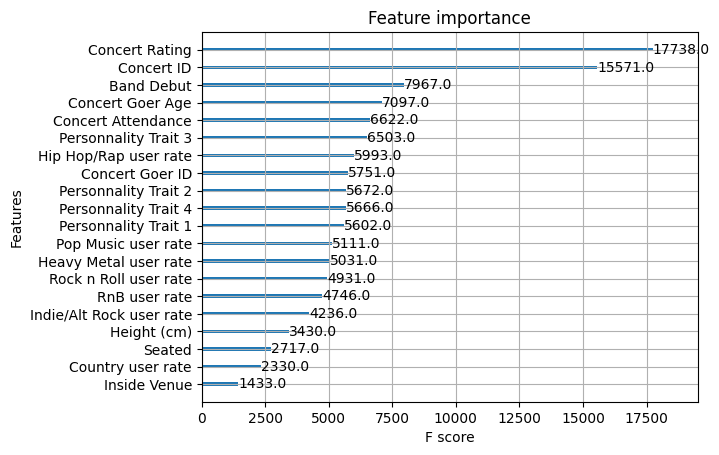

In [392]:
# get best features with feature importance

# plot feature importance

from xgboost import plot_importance

plot_importance(clf, max_num_features=20)

In [313]:
clf = XGBClassifier(n_estimators=1500, max_depth=5, objective='multi:softmax', num_class=4, learning_rate=0.1, colsample_bytree=0.8, subsample=0.9)
clf.fit(X_train, y_train)
f1_score(y_test, clf.predict(X_test), average='micro')

0.6751788142105575

In [296]:
clf = XGBClassifier(n_estimators=1500, max_depth=5, objective='multi:softmax', num_class=4, learning_rate=0.1, colsample_bytree=1)
clf.fit(X_train, y_train)
f1_score(y_test, clf.predict(X_test), average='micro')

0.6707749600993084

In [297]:
clf = XGBClassifier(n_estimators=1500, max_depth=5, objective='multi:softmax', num_class=4, learning_rate=0.1, colsample_bytree=0.8)
clf.fit(X_train, y_train)
f1_score(y_test, clf.predict(X_test), average='micro')

0.6736714547496601

In [298]:
clf = XGBClassifier(n_estimators=1500, max_depth=5, objective='multi:softmax', num_class=4, learning_rate=0.1, colsample_bytree=0.7)
clf.fit(X_train, y_train)
f1_score(y_test, clf.predict(X_test), average='micro')

0.6735532304782171

In [299]:
clf = XGBClassifier(n_estimators=1500, max_depth=5, objective='multi:softmax', num_class=4, learning_rate=0.1, colsample_bytree=0.5)
clf.fit(X_train, y_train)
f1_score(y_test, clf.predict(X_test), average='micro')

0.6720458710173198

In [300]:
clf = XGBClassifier(n_estimators=1500, max_depth=6, objective='multi:softmax', num_class=4, learning_rate=0.1, colsample_bytree=0.6)
clf.fit(X_train, y_train)
f1_score(y_test, clf.predict(X_test), average='micro')

0.6739670154282674

In [301]:
clf = XGBClassifier(n_estimators=1500, max_depth=7, objective='multi:softmax', num_class=4, learning_rate=0.1, colsample_bytree=0.6)
clf.fit(X_train, y_train)
f1_score(y_test, clf.predict(X_test), average='micro')

0.6722823195602057

In [302]:
clf = XGBClassifier(n_estimators=2000, max_depth=5, objective='multi:softmax', num_class=4, learning_rate=0.1, colsample_bytree=0.6)
clf.fit(X_train, y_train)
f1_score(y_test, clf.predict(X_test), average='micro')

0.6731690015960277

In [303]:
clf = XGBClassifier(n_estimators=2500, max_depth=5, objective='multi:softmax', num_class=4, learning_rate=0.1, colsample_bytree=0.6)
clf.fit(X_train, y_train)
f1_score(y_test, clf.predict(X_test), average='micro')

0.6740556836318496

In [304]:
clf = XGBClassifier(n_estimators=2000, max_depth=5, objective='multi:softmax', num_class=4, learning_rate=0.1, colsample_bytree=0.8)
clf.fit(X_train, y_train)
f1_score(y_test, clf.predict(X_test), average='micro')

0.6721936513566236

In [305]:
clf = XGBClassifier(n_estimators=1000, max_depth=5, objective='multi:softmax', num_class=4, learning_rate=0.1, colsample_bytree=0.6)
clf.fit(X_train, y_train)
f1_score(y_test, clf.predict(X_test), average='micro')

0.6709522965064728

In [306]:
clf = XGBClassifier(n_estimators=1000, max_depth=5, objective='multi:softmax', num_class=4, learning_rate=0.1, colsample_bytree=0.6, subsample=0.9)
clf.fit(X_train, y_train)
f1_score(y_test, clf.predict(X_test), average='micro')

0.6740261275639889

In [307]:
clf = XGBClassifier(n_estimators=1500, max_depth=5, objective='multi:softmax', num_class=4, learning_rate=0.1, colsample_bytree=0.6, subsample=0.9, n_jobs=-1)
clf.fit(X_train, y_train)
f1_score(y_test, clf.predict(X_test), average='micro')

0.6734350062067742

In [308]:
clf = XGBClassifier(n_estimators=1500, max_depth=8, objective='multi:softmax', num_class=4, learning_rate=0.1, colsample_bytree=0.6, subsample=0.9)
clf.fit(X_train, y_train)
f1_score(y_test, clf.predict(X_test), average='micro')

0.6686764792811964

In [309]:
clf = XGBClassifier(n_estimators=1500, max_depth=5, objective='multi:softmax', num_class=4, learning_rate=0.1, colsample_bytree=0.8, subsample=0.8)
clf.fit(X_train, y_train)
f1_score(y_test, clf.predict(X_test), average='micro')

0.6732281137317492

In [310]:
clf = XGBClassifier(n_estimators=2000, max_depth=5, objective='multi:softmax', num_class=4, learning_rate=0.1, colsample_bytree=0.6, subsample=0.9)
clf.fit(X_train, y_train)
f1_score(y_test, clf.predict(X_test), average='micro')

0.6747059171247857

In [311]:
clf = XGBClassifier(n_estimators=2500, max_depth=5, objective='multi:softmax', num_class=4, learning_rate=0.1, colsample_bytree=0.6, subsample=0.9)
clf.fit(X_train, y_train)
f1_score(y_test, clf.predict(X_test), average='micro')

0.6748241413962286

In [312]:
clf = XGBClassifier(n_estimators=1500, max_depth=5, objective='multi:softmax', num_class=4, learning_rate=0.1, colsample_bytree=1, subsample=0.9, n_jobs=-1)
clf.fit(X_train, y_train)
f1_score(y_test, clf.predict(X_test), average='micro')

0.6744990246497606

In [221]:
# XGBoost model with PCA

clf_pca = XGBClassifier(n_estimators=1500, max_depth=5, objective='multi:softmax', num_class=4, learning_rate=0.1, colsample_bytree=1, subsample=0.9, n_jobs=-1)
clf_pca.fit(X_train_pca, y_train)
f1_score(y_test, clf_pca.predict(X_test_pca), average='micro')

0.6399479813205651

<AxesSubplot: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

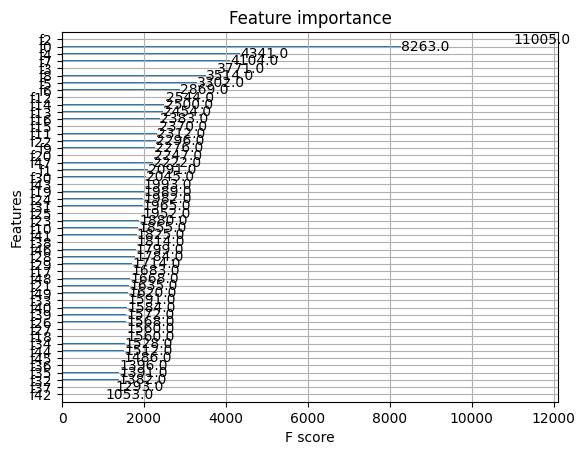

In [222]:
plot_importance(clf_pca)

In [134]:
# Convert back y_pred to the original label and save it into submission.csv
y_final_pred = pd.DataFrame(best_y_pred, columns = ['Predicted'])

y_final_pred['Predicted'] = y_final_pred['Predicted'].map({0: 'Worst Concert Ever', 1: 'Did Not Enjoy', 2: 'Enjoyed', 3: 'Best Concert Ever'})
# insert column 'Id' to the first column
y_final_pred.insert(0, 'Id', range(1, 1 + len(y_final_pred)))

first_y_test = pd.read_csv('./data/test.csv')
y_final_pred['Id'] = first_y_test['Id']

# save the result to submission.csv
y_final_pred.to_csv('submission2.csv', index = False)

# analyze the result
y_final_pred['Predicted'].value_counts() / y_final_pred.shape[0]

Enjoyed               0.450133
Did Not Enjoy         0.432067
Worst Concert Ever    0.066333
Best Concert Ever     0.051467
Name: Predicted, dtype: float64

In [135]:
y_final_pred['Predicted'].value_counts().sum()

30000

In [136]:
analysis = pd.read_csv('./data/train.csv')
analysis['Concert Enjoyment'].value_counts() / analysis.shape[0]

Enjoyed               0.400153
Did Not Enjoy         0.399676
Best Concert Ever     0.100159
Worst Concert Ever    0.100012
Name: Concert Enjoyment, dtype: float64